In [129]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
users_df = pd.read_csv('../takehome_users.csv', encoding='ISO-8859-1')
user_engagement_df = pd.read_csv('../takehome_user_engagement.csv', encoding='ISO-8859-1')

In [13]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
user_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# Update user invited_by_user_id from float to int

In [21]:
users_df['invited_by_user_id'] = users_df['invited_by_user_id'].fillna(0.0).astype(int)

In [22]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 937.6+ KB


In [40]:
temp_df = pd.DataFrame(user_engagement_df.groupby('user_id')['visited'].count())

In [48]:
more_than_3_df = temp_df[temp_df['visited'] > 2]

In [49]:
len(more_than_3_df)

2248

In [50]:
more_than_3_df.reset_index()

,user_id,visited
0,2,14
1,10,284
2,20,7
3,33,18
4,42,342
...,...,...
2243,11975,216
2244,11980,8
2245,11981,4
2246,11988,30


In [51]:
more_than_3_df.head()

,visited
user_id,
2,14
10,284
20,7
33,18
42,342


In [54]:
three_plus_df = pd.merge(more_than_3_df, user_engagement_df, how='inner', on='user_id')

In [55]:
three_plus_df

,user_id,visited_x,time_stamp,visited_y
0,2,14,2013-11-15 03:45:04,1
1,2,14,2013-11-29 03:45:04,1
2,2,14,2013-12-09 03:45:04,1
3,2,14,2013-12-25 03:45:04,1
4,2,14,2013-12-31 03:45:04,1
...,...,...,...,...
200997,11991,5,2014-04-20 14:22:45,1
200998,11991,5,2014-04-25 14:22:45,1
200999,11991,5,2014-04-28 14:22:45,1
201000,11991,5,2014-05-17 14:22:45,1


In [107]:
current_user = 0
users_df['adopted'] = 0

for idx, row in three_plus_df.iloc[0:len(three_plus_df) - 2].iterrows():
    current_user = row['user_id']
    if current_user == three_plus_df.iloc[idx + 2]['user_id']:
        days = (pd.Timestamp(three_plus_df.iloc[idx + 2].time_stamp) - pd.Timestamp(row.time_stamp)).days
        if days < 8:
            users_df['adopted'][users_df[users_df['object_id'] == row['user_id']]['object_id']] = 1
            
    else:
        continue

/var/folders/qp/hgh__lqs1dz1wk35m_9mqmn40000gn/T/ipykernel_39935/2240458857.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['adopted'][users_df[users_df['object_id'] == row['user_id']]['object_id']] = 1


In [106]:
users_df.groupby('adopted')['adopted'].count()

adopted
0    10344
1     1656
Name: adopted, dtype: int64

In [109]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  int64  
 10  adopted                     12000 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.0+ MB


       creation_source  opted_in_to_mailing_list  enabled_for_marketing_drip  \
0                    0                         1                           0   
1                    1                         0                           0   
2                    1                         0                           0   
3                    0                         0                           0   
4                    0                         0                           0   
...                ...                       ...                         ...   
11995                1                         0                           0   
11996                4                         0                           0   
11997                0                         1                           1   
11998                3                         0                           0   
11999                2                         0                           1   

       invited_by_user_id  adopted  
0 

<AxesSubplot:>

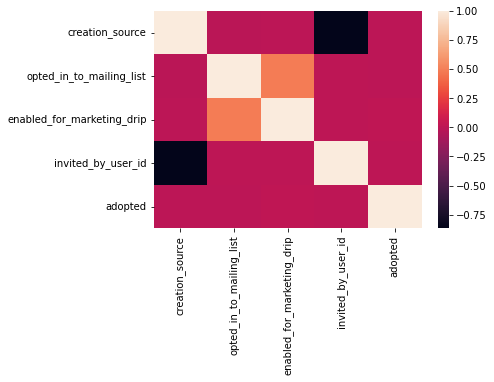

In [151]:
# users_df['invited_by_user_id'] = users_df['invited_by_user_id'] != 0
# users_df['invited_by_user_id'].replace(to_replace=[True, False], value=[1,0], inplace=True)
# users_df['creation_source'].replace(to_replace=users_df['creation_source'].unique(), \
#     value=list(np.arange(len(users_df['creation_source'].unique()))), inplace=True)
# users_df = users_df.drop(columns=['object_id','last_session_creation_time','org_id'])
int_types = users_df.select_dtypes(['int64'])
print(int_types)
sns.heatmap(int_types.corr())

###### It doesn't appear to me to be enough data to really determine predictors of user adoption.